# Hack Western - MRI - Brain Tumor

In [12]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import pickle
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

__Split data into train, test and val__

In [2]:
import splitfolders
splitfolders.ratio('MRI - BrainTurmor/dataset', output="MRI - BrainTurmor/train-test-val_datasets", seed=123, ratio=(.8, 0.1, 0.1))

Copying files: 3160 files [00:18, 166.85 files/s]


__Data Augmentation__

In [34]:
image_dimension = 224
batch_size = 32

# Creating training, validation, and test image flows
train_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               width_shift_range= 0.2,
                               height_shift_range=0.2,
                               rotation_range=0.3,
                               horizontal_flip = True)



test_gen = ImageDataGenerator(rescale = 1/255)


##############################################################################

train_set = train_gen.flow_from_directory('MRI - BrainTurmor/train-test-val_datasets/train',
                                          target_size = (image_dimension,image_dimension), 
                                          batch_size = batch_size,
                                          class_mode = 'categorical')


val_gen = test_gen.flow_from_directory('MRI - BrainTurmor/train-test-val_datasets/val',
                                      target_size = (image_dimension,image_dimension),
                                      batch_size = batch_size,
                                      class_mode = 'categorical')



test_set = test_gen.flow_from_directory('MRI - BrainTurmor/train-test-val_datasets/test',
                                        target_size = (image_dimension,image_dimension),
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle=False)

Found 2624 images belonging to 4 classes.
Found 314 images belonging to 4 classes.
Found 321 images belonging to 4 classes.


In [35]:
train_set.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

### Modeling

In [36]:
CNN_model = Sequential()

CNN_model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3))) #firstlayer
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (6, 6), activation='relu',input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (6, 6), activation='relu',padding="same",input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Flatten())
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(units=4, activation='softmax'))
CNN_model.compile(loss=keras.losses.categorical_crossentropy,optimizer = "adam",metrics=["accuracy"])
CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 49, 49, 64)       

In [37]:
epochs = 50
batch_size = 32
num_of_train_samples = 2624  
num_of_val_samples = 314 

CNNmodel = CNN_model.fit_generator(
    train_set,
    steps_per_epoch = num_of_train_samples / batch_size,
    epochs = epochs,
    validation_data = val_gen,
    validation_steps = num_of_val_samples / batch_size
)

Epoch 1/50
82/82 [==============================] - 38s 452ms/step - loss: 1.3651 - accuracy: 0.2980 - val_loss: 1.3219 - val_accuracy: 0.4299
Epoch 2/50
82/82 [==============================] - 36s 444ms/step - loss: 1.3112 - accuracy: 0.3769 - val_loss: 1.2872 - val_accuracy: 0.4045
Epoch 3/50
82/82 [==============================] - 36s 444ms/step - loss: 1.2108 - accuracy: 0.4375 - val_loss: 1.1101 - val_accuracy: 0.4809
Epoch 4/50
82/82 [==============================] - 36s 438ms/step - loss: 1.1558 - accuracy: 0.4710 - val_loss: 1.0700 - val_accuracy: 0.5159
Epoch 5/50
82/82 [==============================] - 34s 413ms/step - loss: 1.0695 - accuracy: 0.5347 - val_loss: 1.0928 - val_accuracy: 0.5382
Epoch 6/50
82/82 [==============================] - 34s 409ms/step - loss: 1.0558 - accuracy: 0.5495 - val_loss: 1.0211 - val_accuracy: 0.5318
Epoch 7/50
82/82 [==============================] - 34s 415ms/step - loss: 1.0569 - accuracy: 0.5385 - val_loss: 1.0470 - val_accuracy: 0.5382

In [38]:
CNN_model.save('CNN_model_brain.h5')

In [39]:
score = CNN_model.evaluate(test_set, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 1s 107ms/step - loss: 0.5304 - accuracy: 0.8162
Test loss: 0.5304241180419922
Test accuracy: 0.8161993622779846


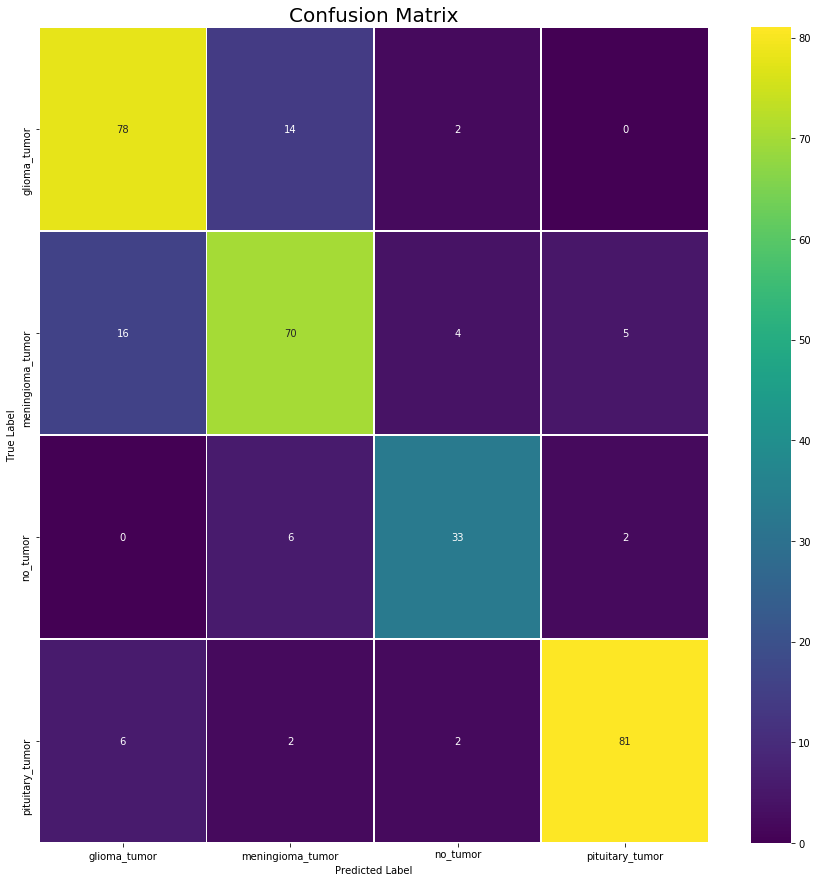

In [40]:
conf_mat=confusion_matrix(y_true=test_set.classes[test_set.index_array], y_pred=np.argmax(CNN_model.predict(test_set), axis=1))

plt.figure(figsize = (15,15))
x_axis_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
y_axis_labels =  ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
sns.heatmap(conf_mat,annot=True,cbar=True,cmap="viridis",linewidths=0.7, xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Confusion Matrix',size = 20)
plt.xlabel("Predicted Label", size = 10)
plt.ylabel("True Label", size = 10)
plt.show()

In [41]:
target_names = list(train_set.class_indices.keys())
trueClass=test_set.classes[test_set.index_array]
predictedClass=np.argmax(CNN_model.predict(test_set), axis=1)

In [42]:
print(classification_report(trueClass, predictedClass, target_names=target_names))

                  precision    recall  f1-score   support

    glioma_tumor       0.78      0.83      0.80        94
meningioma_tumor       0.76      0.74      0.75        95
        no_tumor       0.80      0.80      0.80        41
 pituitary_tumor       0.92      0.89      0.91        91

        accuracy                           0.82       321
       macro avg       0.82      0.82      0.82       321
    weighted avg       0.82      0.82      0.82       321

